# Prepare Data for YOLO



In [1]:
import os

base_dir = "../data/part_two_data/output"
sets = ["train", "val"]

for s in sets:
    img_dir = os.path.join(base_dir, "images", s)
    lbl_dir = os.path.join(base_dir, "labels", s)

    img_files = [f for f in os.listdir(img_dir) if f.endswith((".jpg", ".png", ".jpeg"))]
    lbl_files = [f for f in os.listdir(lbl_dir) if f.endswith(".txt")]

    print(f"\n Ensemble : {s}")
    print(f"    {len(img_files)} images trouvées")
    print(f"    {len(lbl_files)} labels trouvés")

    img_bases = set(os.path.splitext(f)[0] for f in img_files)
    lbl_bases = set(os.path.splitext(f)[0] for f in lbl_files)

    missing_labels = img_bases - lbl_bases

    missing_images = lbl_bases - img_bases

    print(f"    Images sans label : {len(missing_labels)}")
    print(f"    Labels sans image : {len(missing_images)}")

    for name in missing_labels:
        img_path = os.path.join(img_dir, name + ".jpg")
        if os.path.exists(img_path):
            os.remove(img_path)
            print(f"    Image supprimée : {img_path}")

    for name in missing_images:
        lbl_path = os.path.join(lbl_dir, name + ".txt")
        if os.path.exists(lbl_path):
            os.remove(lbl_path)
            print(f"   Label supprimé : {lbl_path}")

print("\n Vérification terminée : les ensembles train/val sont propres.")



 Ensemble : train
    4737 images trouvées
    4737 labels trouvés
    Images sans label : 0
    Labels sans image : 0

 Ensemble : val
    510 images trouvées
    510 labels trouvés
    Images sans label : 0
    Labels sans image : 0

 Vérification terminée : les ensembles train/val sont propres.


In [ ]:
import torch

print("GPU available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))


GPU available: False


In [1]:
import torch
print(torch.__version__)
print(torch.version.cuda)


2.9.0+cu126
12.6


In [2]:
import torch

print("PyTorch version:", torch.__version__)
print("CUDA version PyTorch sees:", torch.version.cuda)
print("GPU available:", torch.cuda.is_available())


PyTorch version: 2.9.0+cu126
CUDA version PyTorch sees: 12.6
GPU available: True


In [32]:
import torch

print("PyTorch version:", torch.__version__)
print("CUDA version PyTorch sees:", torch.version.cuda)
print("GPU available:", torch.cuda.is_available())


PyTorch version: 2.9.0+cpu
CUDA version PyTorch sees: None
GPU available: False


In [33]:
import torch

print(f"Version de PyTorch : {torch.__version__}")
print(f"CUDA disponible : {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"Version de CUDA (utilisée par PyTorch) : {torch.version.cuda}")
    print(f"Nom de l'appareil CUDA : {torch.cuda.get_device_name(0)}")

Version de PyTorch : 2.9.0+cpu
CUDA disponible : False


In [3]:
from ultralytics import YOLO


model = YOLO("yolov8s.pt")  


model.train(
    data="data2.yaml",         
    epochs=50,                
    batch=16,                                 
    imgsz=640,
    lr0=0.001,                 
    lrf=0.01,  
    optimizer="Adam",
    patience=5,
    augment=True,       
    flipud=0.5,
    fliplr=0.5,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    scale=0.5,
    translate=0.1,      
    project="runs/train",     
    name="yolov8_brain_tumor_gpu",
    save=True,                
    workers=4                 
)

print(" Entraînement YOLOv8 terminé !")


New https://pypi.org/project/ultralytics/8.3.221 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.218  Python-3.13.7 torch-2.9.0+cu126 CUDA:0 (NVIDIA RTX 2000 Ada Generation Laptop GPU, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data2.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_brain_tumor_gpu, n


image 1/1 c:\Users\oussa\Documents\Diagnostic-multimodal-par-IA-via-Transfer-Learning\Medical-Image-Analysis-AI\US5_prepare_data_yolo\..\data\part_two_data\test\image_glioma.jpg: 640x544 1 Meningioma, 172.8ms
Speed: 4.5ms preprocess, 172.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


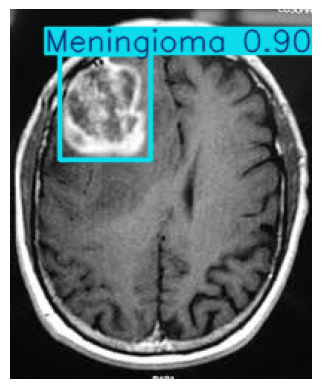

In [27]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
model = YOLO("../US8_save_model_yolo/brain_tumor_model_1/best.pt")

results = model.predict(source="../data/part_two_data/test/image_glioma.jpg", show=True, conf=0.5)
image_result=results[0].plot()
image_result=cv2.cvtColor(image_result,cv2.COLOR_BGR2RGB)
plt.imshow(image_result)
plt.axis("off")
plt.show()